In [7]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [8]:
from computations.insights.opinions import varying_parameters
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution
from computations.insights.opinions import mse_assimilation_uncertainty

In [9]:
information_source = (0.6, 0.3)
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, unique, linespace)
network = ArtificialNetwork(100, "random_graph", p=0.2)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

In [10]:
update_rule = UpdateRule()
interactions = Interactions(update_rule, interaction_rate=0.5,information_source=information_source, draw_from_source=True)
insights = Insights(["mse", "medse"])
simulation = Simulation(10000, insights)

In [11]:
assimilation_biases = [0, 0.2, 0.4, 0.6, 1]
mse_results = []
medse_results = []
for assimilation_bias in assimilation_biases:
    interactions.update_rule.assimilation_bias = assimilation_bias
    simulation.run(interactions, agent_network)
    mse_results.append(simulation.insights.mse_evolution)
    medse_results.append(simulation.insights.medse_evolution)

Progress: 100%|██████████| 10000/10000 [00:01<00:00, 5677.31it/s]


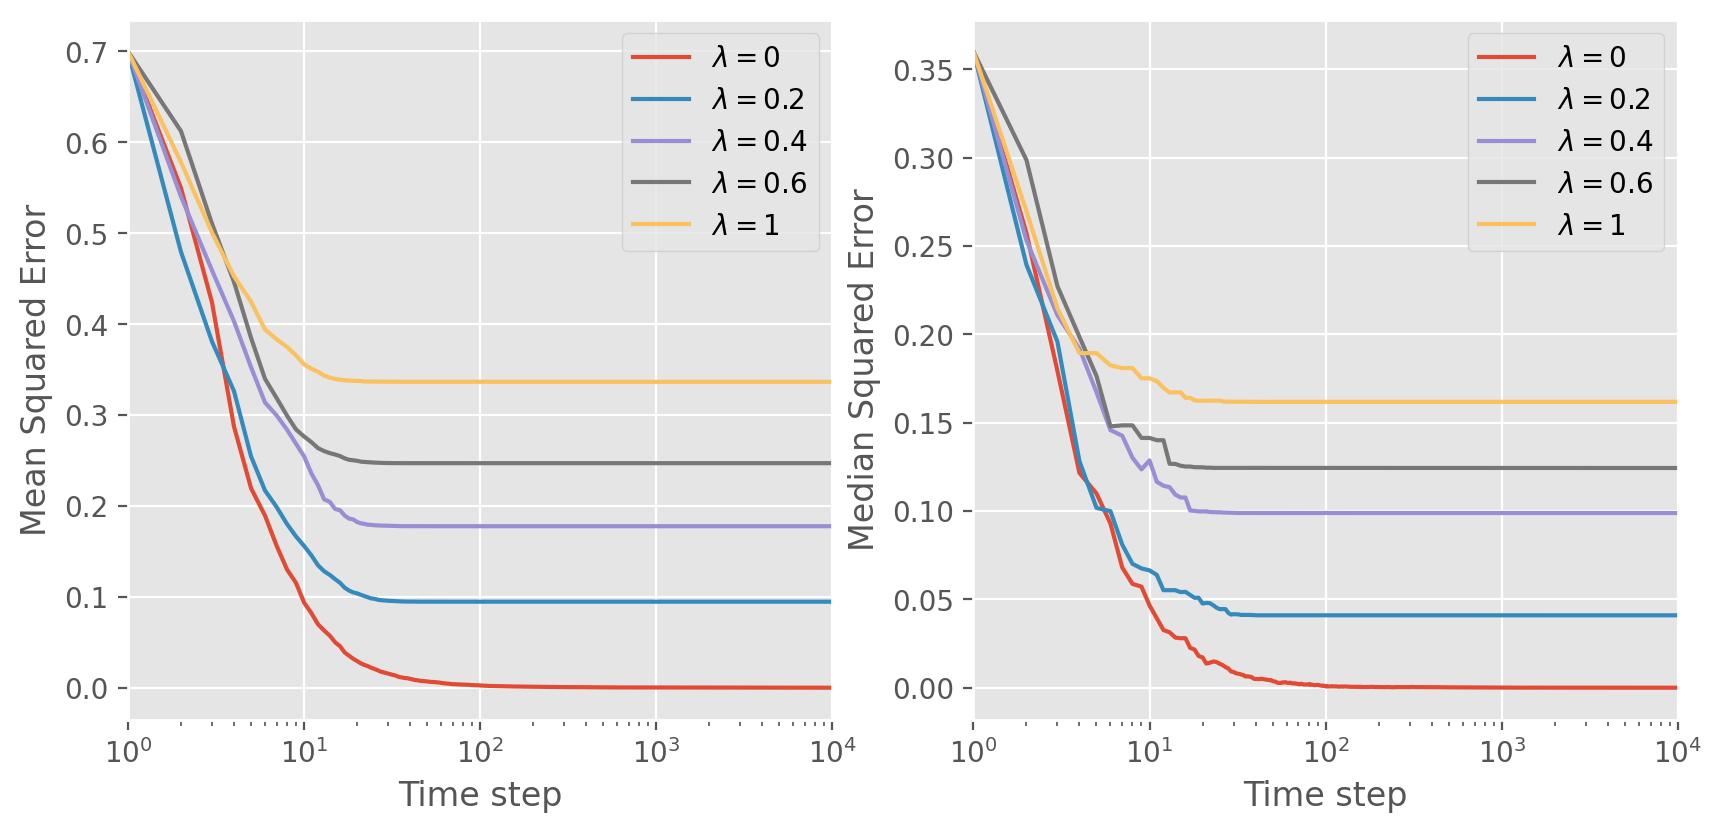

In [13]:
plt.figure(1, [10, 10])
plt.subplot(221)
plt.xscale('log')
plt.xlim(1,10000)
for i in range(len(mse_results)):
    plt.plot(mse_results[i], label=r'$\lambda = {}$'.format(assimilation_biases[i]))
plt.ylabel("Mean Squared Error")
plt.xlabel("Time step")
plt.legend()
plt.subplot(222)
plt.xscale('log')
plt.xlim(1,10000)
for i in range(len(medse_results)):
    plt.plot(medse_results[i], label=r'$\lambda = {}$'.format(assimilation_biases[i]))
plt.ylabel("Median Squared Error")
plt.xlabel("Time step")
plt.legend()